In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_gongju=pd.read_csv('/content/drive/MyDrive/dataset (1)/TRAIN/공주.csv')

In [4]:
train_gongju

,연도,일시,측정소,PM2.5
0,0,01-01 00:00,공주,0.056
1,0,01-01 01:00,공주,0.060
2,0,01-01 02:00,공주,0.068
3,0,01-01 03:00,공주,0.060
4,0,01-01 04:00,공주,0.068
...,...,...,...,...
35059,3,12-31 19:00,공주,0.052
35060,3,12-31 20:00,공주,0.056
35061,3,12-31 21:00,공주,0.052
35062,3,12-31 22:00,공주,0.052


In [5]:
train_gong_aws=pd.read_csv('/content/drive/MyDrive/dataset (1)/TRAIN_AWS/공주.csv')

In [6]:
train_gong_aws

,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,공주,0.173776,0.201944,0.023018,0.0,0.828
1,0,01-01 01:00,공주,0.176935,0.168611,0.030691,0.0,0.831
2,0,01-01 02:00,공주,0.180095,0.087222,0.033248,0.0,0.784
3,0,01-01 03:00,공주,0.178515,0.087222,0.025575,0.0,0.745
4,0,01-01 04:00,공주,0.164297,0.113889,0.020460,0.0,0.750
...,...,...,...,...,...,...,...,...
35059,3,12-31 19:00,공주,0.287520,0.765833,0.071611,0.0,0.577
35060,3,12-31 20:00,공주,0.281201,0.753056,0.063939,0.0,0.586
35061,3,12-31 21:00,공주,0.260664,0.000000,0.010230,0.0,0.674
35062,3,12-31 22:00,공주,0.262243,0.011944,0.020460,0.0,0.660


In [7]:
train_gog=pd.merge(train_gongju,train_gong_aws)

In [8]:
train_gog

,연도,일시,측정소,PM2.5,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,공주,0.056,공주,0.173776,0.201944,0.023018,0.0,0.828
1,0,01-01 01:00,공주,0.060,공주,0.176935,0.168611,0.030691,0.0,0.831
2,0,01-01 02:00,공주,0.068,공주,0.180095,0.087222,0.033248,0.0,0.784
3,0,01-01 03:00,공주,0.060,공주,0.178515,0.087222,0.025575,0.0,0.745
4,0,01-01 04:00,공주,0.068,공주,0.164297,0.113889,0.020460,0.0,0.750
...,...,...,...,...,...,...,...,...,...,...
35059,3,12-31 19:00,공주,0.052,공주,0.287520,0.765833,0.071611,0.0,0.577
35060,3,12-31 20:00,공주,0.056,공주,0.281201,0.753056,0.063939,0.0,0.586
35061,3,12-31 21:00,공주,0.052,공주,0.260664,0.000000,0.010230,0.0,0.674
35062,3,12-31 22:00,공주,0.052,공주,0.262243,0.011944,0.020460,0.0,0.660


In [9]:
train_gog.loc[train_gog['연도']==0,'일시']

0       01-01 00:00
1       01-01 01:00
2       01-01 02:00
3       01-01 03:00
4       01-01 04:00
           ...     
8755    12-31 19:00
8756    12-31 20:00
8757    12-31 21:00
8758    12-31 22:00
8759    12-31 23:00
Name: 일시, Length: 8760, dtype: object

In [10]:
row=train_gog.loc[train_gog['연도']==0]
row['일시']='2001-'+row['일시']
row['일시']=pd.to_datetime(row['일시'],format='%Y-%m-%d %H:%M')
train_gog.loc[train_gog['연도']==0,'일시']=row['일시']

<ipython-input-10-39725c74f90d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['일시']='2001-'+row['일시']
<ipython-input-10-39725c74f90d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['일시']=pd.to_datetime(row['일시'],format='%Y-%m-%d %H:%M')


In [11]:
def datetime(num,year):
    row=train_gog.loc[train_gog['연도']==num]
    row['일시']= year+'-'+row['일시']
    row['일시']=pd.to_datetime(row['일시'],format='%Y-%m-%d %H:%M')
    train_gog.loc[train_gog['연도']==num,'일시']=row['일시']

In [12]:
datetime(1,'2002')
datetime(2,'2003')
datetime(3,'2004')

<ipython-input-11-be7223917d49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['일시']= year+'-'+row['일시']
<ipython-input-11-be7223917d49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['일시']=pd.to_datetime(row['일시'],format='%Y-%m-%d %H:%M')
<ipython-input-11-be7223917d49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [13]:
train_gog['일시'] = pd.to_datetime(train_gog['일시'])

In [14]:
train_gog['time'] = train_gog['일시'].dt.time

In [15]:
train_gog['month']=train_gog['일시'].dt.month

In [16]:
train_gog.loc[train_gog['month'].isin([3, 4, 5]), 'season'] = '봄'
train_gog.loc[train_gog['month'].isin([6, 7, 8]), 'season'] = '여름'
train_gog.loc[train_gog['month'].isin([9, 10, 11]), 'season'] = '가을'
train_gog.loc[train_gog['month'].isin([12, 1, 2]), 'season'] = '겨울'

In [17]:
train_gog.drop(['연도','일시','측정소','지점','month'],axis=1,inplace=True)

In [18]:
train_gog

,PM2.5,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),time,season
0,0.056,0.173776,0.201944,0.023018,0.0,0.828,00:00:00,겨울
1,0.060,0.176935,0.168611,0.030691,0.0,0.831,01:00:00,겨울
2,0.068,0.180095,0.087222,0.033248,0.0,0.784,02:00:00,겨울
3,0.060,0.178515,0.087222,0.025575,0.0,0.745,03:00:00,겨울
4,0.068,0.164297,0.113889,0.020460,0.0,0.750,04:00:00,겨울
...,...,...,...,...,...,...,...,...
35059,0.052,0.287520,0.765833,0.071611,0.0,0.577,19:00:00,겨울
35060,0.056,0.281201,0.753056,0.063939,0.0,0.586,20:00:00,겨울
35061,0.052,0.260664,0.000000,0.010230,0.0,0.674,21:00:00,겨울
35062,0.052,0.262243,0.011944,0.020460,0.0,0.660,22:00:00,겨울


In [19]:
#map={'봄':1,'여름':2,'가을':3,'겨울':4}
#train_gog['season'] = train_gog['season'].map(map)

In [20]:
train_gog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    34294 non-null  float64
 1   기온(°C)   34380 non-null  float64
 2   풍향(deg)  34380 non-null  float64
 3   풍속(m/s)  34380 non-null  float64
 4   강수량(mm)  34380 non-null  float64
 5   습도(%)    34380 non-null  float64
 6   time     35064 non-null  object 
 7   season   35064 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.4+ MB


In [21]:
train_gog.corr()

<ipython-input-21-3d1c158939c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_gog.corr()


,PM2.5,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
PM2.5,1.000000,-0.307028,-0.009899,-0.155769,-0.091047,0.022964
기온(°C),-0.307028,1.000000,0.107108,0.194147,0.070114,-0.082578
풍향(deg),-0.009899,0.107108,1.000000,0.457833,-0.025603,-0.361055
풍속(m/s),-0.155769,0.194147,0.457833,1.000000,0.053045,-0.482510
강수량(mm),-0.091047,0.070114,-0.025603,0.053045,1.000000,0.159311
습도(%),0.022964,-0.082578,-0.361055,-0.482510,0.159311,1.000000


In [22]:
train_gog.isna().sum()

PM2.5      770
기온(°C)     684
풍향(deg)    684
풍속(m/s)    684
강수량(mm)    684
습도(%)      684
time         0
season       0
dtype: int64

In [23]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=7)
train_gog[['PM2.5']] = imputer.fit_transform(train_gog[['PM2.5']])

In [24]:
train_gog[['기온(°C)']] = imputer.fit_transform(train_gog[['기온(°C)']])

In [25]:
train_gog[['풍향(deg)']] = imputer.fit_transform(train_gog[['풍향(deg)']])

In [26]:
train_gog[['풍속(m/s)']] = imputer.fit_transform(train_gog[['풍속(m/s)']])

In [27]:
train_gog[['강수량(mm)']] = imputer.fit_transform(train_gog[['강수량(mm)']])

In [28]:
train_gog[['습도(%)']] = imputer.fit_transform(train_gog[['습도(%)']])

In [29]:
train_gog

,PM2.5,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),time,season
0,0.056,0.173776,0.201944,0.023018,0.0,0.828,00:00:00,겨울
1,0.060,0.176935,0.168611,0.030691,0.0,0.831,01:00:00,겨울
2,0.068,0.180095,0.087222,0.033248,0.0,0.784,02:00:00,겨울
3,0.060,0.178515,0.087222,0.025575,0.0,0.745,03:00:00,겨울
4,0.068,0.164297,0.113889,0.020460,0.0,0.750,04:00:00,겨울
...,...,...,...,...,...,...,...,...
35059,0.052,0.287520,0.765833,0.071611,0.0,0.577,19:00:00,겨울
35060,0.056,0.281201,0.753056,0.063939,0.0,0.586,20:00:00,겨울
35061,0.052,0.260664,0.000000,0.010230,0.0,0.674,21:00:00,겨울
35062,0.052,0.262243,0.011944,0.020460,0.0,0.660,22:00:00,겨울


In [30]:
train_gog.isna().sum()

PM2.5      0
기온(°C)     0
풍향(deg)    0
풍속(m/s)    0
강수량(mm)    0
습도(%)      0
time       0
season     0
dtype: int64

In [31]:
train_gog=pd.get_dummies(train_gog,columns=['time','season'])

In [32]:
train_x=train_gog.drop('PM2.5',axis=1)
train_y=train_gog.loc[:,'PM2.5']

In [33]:
train_gog

,PM2.5,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),time_00:00:00,time_01:00:00,time_02:00:00,time_03:00:00,...,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00,season_가을,season_겨울,season_봄,season_여름
0,0.056,0.173776,0.201944,0.023018,0.0,0.828,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.060,0.176935,0.168611,0.030691,0.0,0.831,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.068,0.180095,0.087222,0.033248,0.0,0.784,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.060,0.178515,0.087222,0.025575,0.0,0.745,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.068,0.164297,0.113889,0.020460,0.0,0.750,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.052,0.287520,0.765833,0.071611,0.0,0.577,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
35060,0.056,0.281201,0.753056,0.063939,0.0,0.586,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
35061,0.052,0.260664,0.000000,0.010230,0.0,0.674,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
35062,0.052,0.262243,0.011944,0.020460,0.0,0.660,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_gog.iloc[:, 1:] = scaler.fit_transform(train_gog.iloc[:, 1:])

<ipython-input-34-ec35a0b02bdc>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_gog.iloc[:, 1:] = scaler.fit_transform(train_gog.iloc[:, 1:])


In [ ]:
train_gog

,PM2.5,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),time_00:00:00,time_01:00:00,time_02:00:00,time_03:00:00,...,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00,season_가을,season_겨울,season_봄,season_여름
0,0.056,0.142617,0.201944,0.108434,0.0,0.828848,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.060,0.145973,0.168611,0.144578,0.0,0.832078,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.068,0.149329,0.087222,0.156627,0.0,0.781485,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.060,0.147651,0.087222,0.120482,0.0,0.739505,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.068,0.132550,0.113889,0.096386,0.0,0.744887,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.052,0.263423,0.765833,0.337349,0.0,0.558665,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35060,0.056,0.256711,0.753056,0.301205,0.0,0.568353,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35061,0.052,0.234899,0.000000,0.048193,0.0,0.663079,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
35062,0.052,0.236577,0.011944,0.096386,0.0,0.648009,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [110]:
X_train = []
y_train = []
for i in range(48, 35064):
    X_train.append(train_gog.iloc[i-48:i, 1:].values)
    y_train.append(train_gog.iloc[i, 1])

X_train, y_train = np.array(X_train), np.array(y_train)

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [39]:
X_train.shape

(35016, 48, 33)

In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 모델 생성
model = Sequential([
    LSTM(128, input_shape=(48, 33)),  # 입력 데이터의 변수 개수는 34개에서 시간 열을 뺀 33개입니다.
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(72, activation='linear')
])

# 모델 컴파일
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_mae',min_delta=0,verbose=1,restore_best_weights=True,patience=5)
# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=64,callbacks=[es],validation_data=(X_val,y_val))

Epoch 1/50
438/438 [==============================] - 7s 11ms/step - loss: 0.0262 - mae: 0.1040 - val_loss: 0.0011 - val_mae: 0.0250
Epoch 2/50
438/438 [==============================] - 3s 8ms/step - loss: 0.0051 - mae: 0.0544 - val_loss: 8.1243e-04 - val_mae: 0.0209
Epoch 3/50
438/438 [==============================] - 3s 8ms/step - loss: 0.0036 - mae: 0.0455 - val_loss: 7.1429e-04 - val_mae: 0.0196
Epoch 4/50
438/438 [==============================] - 4s 8ms/step - loss: 0.0027 - mae: 0.0396 - val_loss: 8.3541e-04 - val_mae: 0.0219
Epoch 5/50
438/438 [==============================] - 4s 9ms/step - loss: 0.0023 - mae: 0.0358 - val_loss: 6.5764e-04 - val_mae: 0.0180
Epoch 6/50
438/438 [==============================] - 3s 7ms/step - loss: 0.0019 - mae: 0.0329 - val_loss: 5.8551e-04 - val_mae: 0.0174
Epoch 7/50
438/438 [==============================] - 3s 8ms/step - loss: 0.0017 - mae: 0.0306 - val_loss: 4.7222e-04 - val_mae: 0.0149
Epoch 8/50
438/438 [==============================]

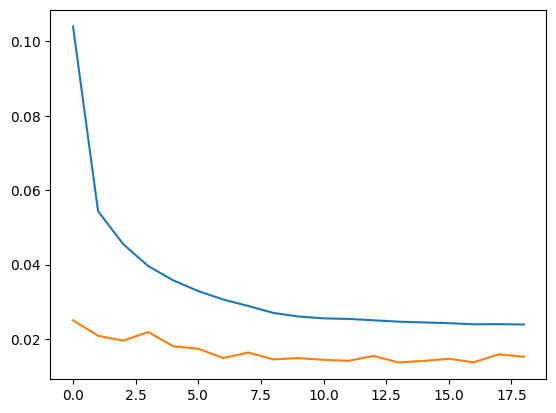

In [115]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.show()

In [157]:
model.save('/content/drive/MyDrive/dataset (1)/gogju.h5')

In [87]:
test_input=pd.read_csv('/content/drive/MyDrive/dataset (1)/TEST_INPUT/공주.csv')

In [88]:
test_aws=pd.read_csv('/content/drive/MyDrive/dataset (1)/TEST_AWS/공주.csv')

In [174]:
test=pd.merge(test_input,test_aws)

In [175]:
test

,연도,일시,측정소,PM2.5,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,4,01-01 00:00,공주,0.060,공주,0.244866,0.123333,0.038363,0.0,0.647
1,4,01-01 01:00,공주,0.064,공주,0.232227,0.167778,0.033248,0.0,0.648
2,4,01-01 02:00,공주,0.072,공주,0.206951,0.000000,0.002558,0.0,0.734
3,4,01-01 03:00,공주,0.064,공주,0.199052,0.000000,0.002558,0.0,0.753
4,4,01-01 04:00,공주,0.056,공주,0.189573,0.000000,0.002558,0.0,0.795
...,...,...,...,...,...,...,...,...,...,...
7723,4,11-18 19:00,공주,0.052,공주,0.445498,0.791667,0.097187,0.0,0.368
7724,4,11-18 20:00,공주,0.056,공주,0.426540,0.781667,0.104859,0.0,0.502
7725,4,11-18 21:00,공주,0.036,공주,0.413902,0.735278,0.048593,0.0,0.484
7726,4,11-18 22:00,공주,0.044,공주,0.404423,0.727222,0.058824,0.0,0.564


In [176]:
test['일시']='2005-'+test['일시']
test['일시']=pd.to_datetime(test['일시'],format='%Y-%m-%d %H:%M')

In [177]:
test['time']=test['일시'].dt.time
test['month']=test['일시'].dt.month
test.loc[test['month'].isin([3, 4, 5]), 'season'] = '봄'
test.loc[test['month'].isin([6, 7, 8]), 'season'] = '여름'
test.loc[test['month'].isin([9, 10, 11]), 'season'] = '가을'
test.loc[test['month'].isin([12, 1, 2]), 'season'] = '겨울'

In [178]:
test.drop(['연도','측정소','지점','month'],axis=1,inplace=True)

In [179]:
test=pd.get_dummies(test,columns=['time','season'])

In [180]:
#map={'봄':1,'여름':2,'가을':3,'겨울':4}
#test['season'] = test['season'].map(map)

In [181]:
test

,일시,PM2.5,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),time_00:00:00,time_01:00:00,time_02:00:00,...,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00,season_가을,season_겨울,season_봄,season_여름
0,2005-01-01 00:00:00,0.060,0.244866,0.123333,0.038363,0.0,0.647,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2005-01-01 01:00:00,0.064,0.232227,0.167778,0.033248,0.0,0.648,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2005-01-01 02:00:00,0.072,0.206951,0.000000,0.002558,0.0,0.734,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2005-01-01 03:00:00,0.064,0.199052,0.000000,0.002558,0.0,0.753,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2005-01-01 04:00:00,0.056,0.189573,0.000000,0.002558,0.0,0.795,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,2005-11-18 19:00:00,0.052,0.445498,0.791667,0.097187,0.0,0.368,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7724,2005-11-18 20:00:00,0.056,0.426540,0.781667,0.104859,0.0,0.502,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7725,2005-11-18 21:00:00,0.036,0.413902,0.735278,0.048593,0.0,0.484,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7726,2005-11-18 22:00:00,0.044,0.404423,0.727222,0.058824,0.0,0.564,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [182]:
test_not_null=test.dropna()

In [187]:
test_not_null=test_not_null.loc[test_not_null['일시']<='2005-11-13 23:00']

In [189]:
test_not_null.drop('일시',axis=1,inplace=True)

In [190]:
X_test=test_not_null.drop('PM2.5',axis=1)
y_test=test_not_null.loc[:,'PM2.5']

In [191]:
X_test

,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%),time_00:00:00,time_01:00:00,time_02:00:00,time_03:00:00,time_04:00:00,...,time_18:00:00,time_19:00:00,time_20:00:00,time_21:00:00,time_22:00:00,time_23:00:00,season_가을,season_겨울,season_봄,season_여름
0,0.244866,0.123333,0.038363,0.0,0.647,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.232227,0.167778,0.033248,0.0,0.648,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.206951,0.000000,0.002558,0.0,0.734,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.199052,0.000000,0.002558,0.0,0.753,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.189573,0.000000,0.002558,0.0,0.795,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,0.462875,0.000000,0.002558,0.0,0.880,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7604,0.443918,0.000000,0.002558,0.0,0.917,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7605,0.436019,0.000000,0.002558,0.0,0.951,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7606,0.423381,0.000000,0.005115,0.0,0.954,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [198]:
answer

,연도,일시,측정소,PM2.5
0,4,01-03 00:00,공주,NaN
1,4,01-03 01:00,공주,NaN
2,4,01-03 02:00,공주,NaN
3,4,01-03 03:00,공주,NaN
4,4,01-03 04:00,공주,NaN
...,...,...,...,...
78331,4,11-16 19:00,홍성읍,NaN
78332,4,11-16 20:00,홍성읍,NaN
78333,4,11-16 21:00,홍성읍,NaN
78334,4,11-16 22:00,홍성읍,NaN


In [192]:
answer=pd.read_csv('/content/drive/MyDrive/dataset (1)/answer_sample.csv')

In [217]:
start = 0
end = 48
for i in range(0, len(answer.loc[answer['측정소']=='공주', 'PM2.5'])//72):
    X_test = test_not_null.iloc[start:end, 1:].values
    y_pred = model.predict(X_test.reshape(1, 48, 33))
    answer.loc[answer['측정소']=='공주', 'PM2.5'].iloc[i*72:(i+1)*72] = y_pred[0]
    start += 48
    end += 48

1/1 [==============================] - 0s 34ms/step


In [216]:
answer.to_csv('/content/drive/MyDrive/dataset (1)/answer_gogju.csv')